# TIASA PATRA

# The Sparks Foundation (data science and business analytics internship)

# Task 1- Prediction using supervised ML (Level-Beginner)

Objective of the study is to predict the percentage of a student based on no.of study hours. The given dataset has only two variable. We will use method of linear regression for prediction.

In [1]:
#we need to import required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#we will import the dataset from external source

In [4]:
data= pd.read_csv("http://bit.ly/w-data")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
#statistical feature of the data

In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


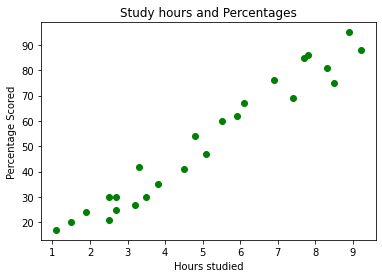

In [12]:
#plotting the data to get an idea of relationship between "Hours" of study and "Scores"
plt.scatter( x= data['Hours'] , y = data['Scores'] , color = 'green')
plt.title('Study hours and Percentages')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Scored')
plt.show()

In [13]:
#We can see a possitive relationship between these two variables

In [14]:
#Lets see the magnitude of relationship using heatmap

In [16]:
import seaborn as sns

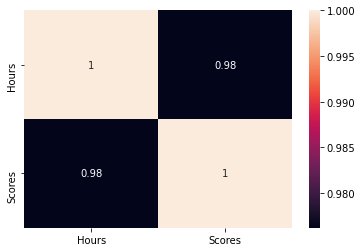

In [17]:
sns.heatmap(data.corr(),annot=True)

In [18]:
#The model
#We will separate the dependent and independent variable for regression

In [19]:
X = data['Hours'].values.reshape(-1,1)
Y = data['Scores'].values.reshape(-1,1)

In [ ]:
#split the data set into training and testing

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [21]:
#training the algorithm

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("Training Complete")

Training Complete


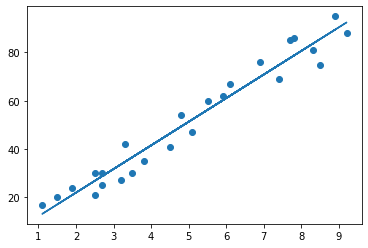

In [29]:
#Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
#Plotting the data
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

In [ ]:
#We can see a possitively sloped linear regression line; Hence there is a possitive relationship between study hours and scores.

In [30]:
#Testing data- in hors

In [31]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [32]:
#Predicting the scores
y_pred = regressor.predict(X_test)

In [35]:
#compare the actual values and the predicted values
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten()})  
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


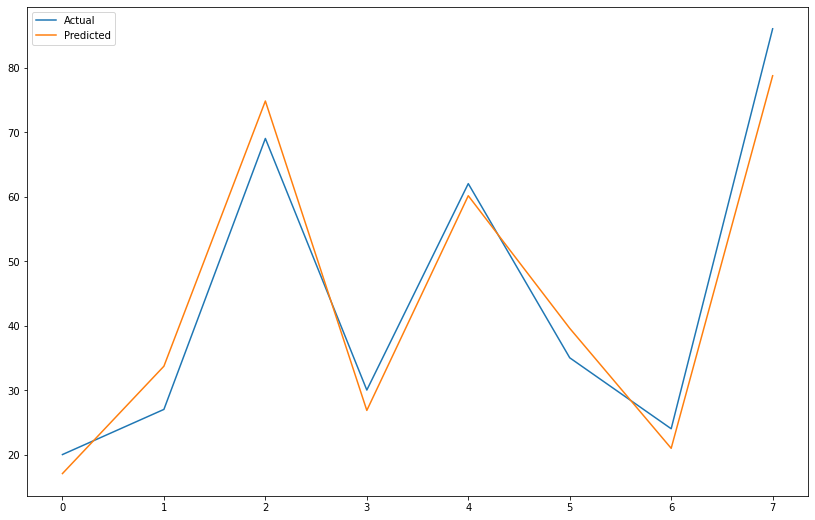

In [36]:
#Visualizing the result
df.plot(kind='line', figsize= (14,9))

In [37]:
#Let us see is it a good fitted model?
#for that we will look at R squared and mean absolute error
from sklearn import metrics
mse = (metrics.mean_absolute_error(Y_test, y_pred))
print("Mean Absolut Error:", mse)
r_2 = metrics.r2_score(Y_test, y_pred)
print("R Squared value:",r_2)

Mean Absolut Error: 4.419727808027652
R Squared value: 0.9568211104435257


In [38]:
#R-squared is 0.95 we can infer it is a good fitted model and we can predict the sucessfully when the scores are given


In [39]:
#how much will be the score when a student studies 9.25 hours?
hours= np.array([9.25])
hours = hours.reshape(-1,1)

own_prediction = regressor.predict(hours)
print("No. of hours= {}".format(hours))
print("The percentage score will be = {}".format(own_prediction[0]))

No. of hours= [[9.25]]
The percentage score will be = [92.91505723]


The score will be 92.91 when hours of study is 9.25.

# Thank you